In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import fm2p
import cv2
from tqdm import tqdm
import fm2p

c:\Users\dmartins\anaconda3\envs\fm1\lib\site-packages\oasis\functions.py:13: UserWarning: Could not find cvxpy. Don't worry, you can still use OASIS, just not the slower interior point methods we compared to in the papers.
  warn("Could not find cvxpy. Don't worry, you can still use OASIS, " +


In [3]:
frames = fm2p.pack_video_frames(r'T:\Mini2P\241219_DMM_DMM037_mini2p\Rec4\behavior_cam_test_mp4_02_0001.mp4')

100%|██████████| 6000/6000 [02:32<00:00, 39.28it/s]


In [8]:
(6000/7.5)/60

13.333333333333334

In [2]:
basepath = r'K:\FreelyMoving2P\241204_DMM_DMM031_freelymoving_01'
rec_name = '241204_DMM_DMM031_freelymoving_01'

In [3]:
twop = fm2p.TwoP(basepath, rec_name)
twop.find_files()
twop_dict = twop.calc_dFF()

sps = twop_dict['spikes_per_sec'].copy()

print(twop.twop_dt)
twopT = np.linspace(0, np.size(sps,1)*twop.twop_dt, np.size(sps,1))

0.13333333333333333


In [7]:
reye = fm2p.Eyecam(basepath, rec_name)
reye.find_files()
eye_xyl, ellipse_fit_results = reye.track_pupil()
eyevid_arr = fm2p.pack_video_frames(reye.eye_avi)
reye.save_tracking(ellipse_fit_results, eye_xyl, eyevid_arr)

100%|██████████| 83522/83522 [00:12<00:00, 6790.46it/s]


LinAlg error count = 130
boolean index did not match indexed array along dimension 1; dimension is 83522 but corresponding boolean dimension is 836
Error in scale, center, and calibration figures. Skipping these for now


100%|██████████| 83522/83522 [00:53<00:00, 1566.12it/s]


In [8]:
top = fm2p.Topcam(basepath, rec_name)
top.find_files()
body_tracking_results = top.track_body()

In [9]:
from scipy.interpolate import interp1d
def interpT(x, xT, toT):
    """ Interpolate timestamps.
    
    Parameters
    ----------
    x : np.array
        Array of values to interpolate.
    xT : np.array
        Array of datetime objects corresponding to x.
    toT : np.array
        Array of datetime objects to interpolate to.

    Returns
    -------
    out : np.array
        Array of interpolated values.

    """

    # Convert timestamps to float values.

    out = interp1d(xT, x,
                   bounds_error=False)(toT)
    
    return out


In [10]:
theta = np.array(ellipse_fit_results['theta'])
phi = np.array(ellipse_fit_results['phi'])

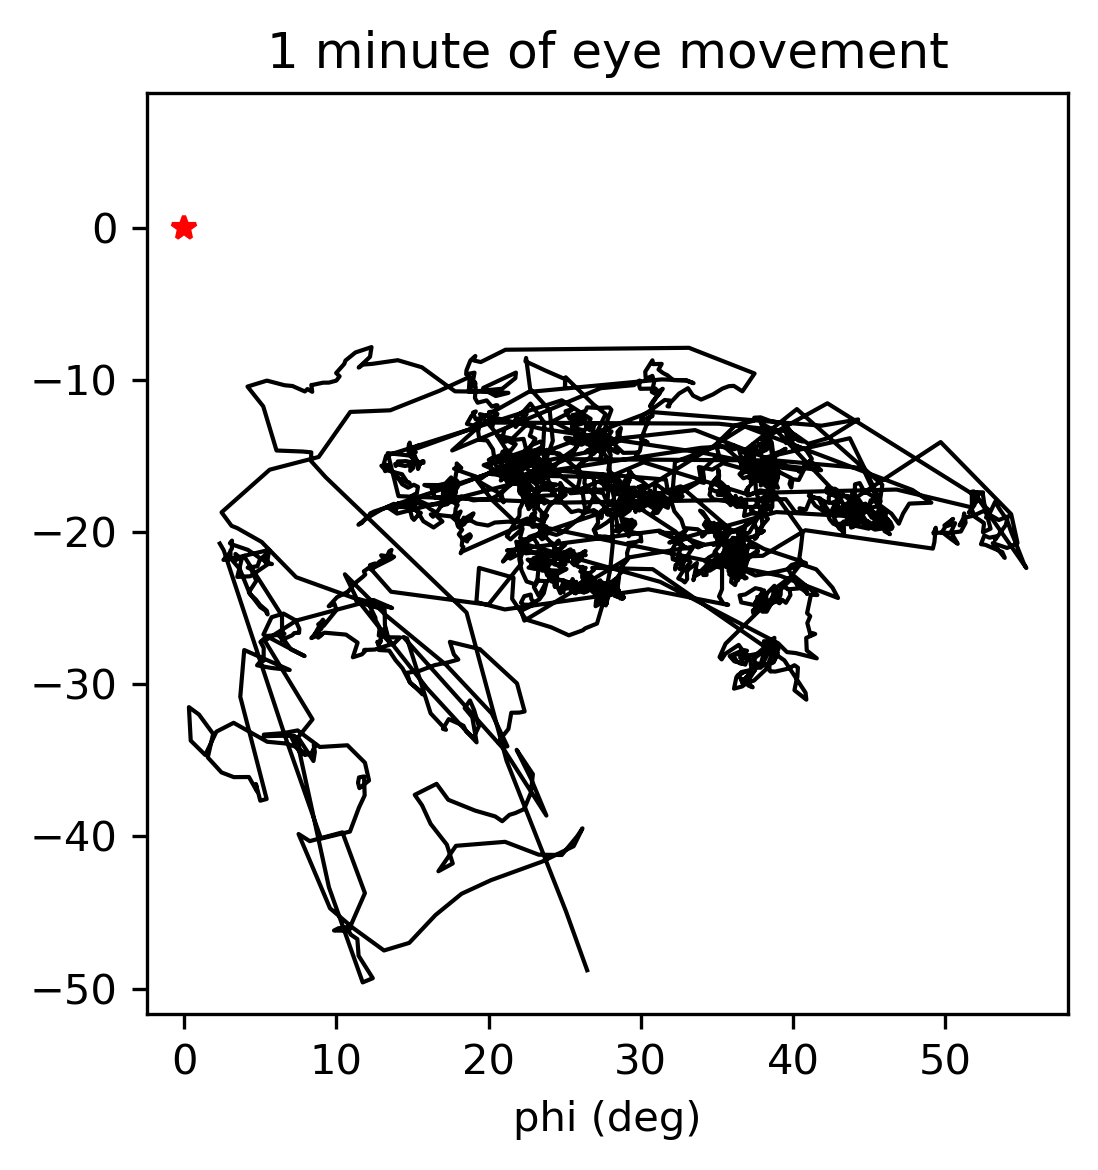

In [11]:
plt.figure(figsize=(4,4), dpi=300)
plt.plot(np.rad2deg(theta)[3600:3600*2], np.rad2deg(phi)[3600:3600*2], 'k-', lw=1)
plt.xlim([-10,60])
plt.ylim([-60,0])
plt.title('1 minute of eye movement')
plt.axis('square')
plt.xlabel('theta (deg)')
plt.xlabel('phi (deg)')
plt.plot(0,0, 'r*')
plt.tight_layout()

In [ ]:
np.nanargmin(np.abs(twopT[-1]-eyeT))

17980

In [43]:
theta_interp = interpT(theta, eyeT, twopT)